In [145]:
from algorithm_ranking import MeasurementsVisualizer, MeasurementsManager, RankVariantsDFGTr, RankVariantsSort2
from am4pa.linnea import LinneaConfig, MeasurementsLinnea
from variants_compare import VariantsCompare
from pm4py.objects.conversion.log import converter as log_converter
import random
import os

In [75]:
linnea_config = LinneaConfig("GLS",12)
linnea_config.set_local_directory("linnea/GLS/")
linnea_config.setup_backend_details(server="login18-1.hpc.itc.rwth-aachen.de",
                                   uname = "as641651",
                                   init_script="~/.analyzer",
                                   backend_dir="~/PhD/va4algs-exps/GLS/")

In [76]:
linnea_config.connect_backend()

In [77]:
#linnea_config.bm.copy_to_backend(linnea_config.local_dir, linnea_config.backend_dir)

In [78]:
op_sizes = ["1000","100"]
ms = MeasurementsLinnea(linnea_config,op_sizes)

In [80]:
ms.generate_variants(bGenerate=True)

source ~/.analyzer; cd ~/PhD/va4algs-exps/GLS; python generate-variants-linnea.py 1000 100 --threads=12
['New solution:.............5.54e+08\n', 'New solution:.............5.46e+08\n', 'New solution:.............4.45e+08\n', 'Nodes:.........................405\n', 'Nodes:.........................738\n', 'Nodes:........................1009\n', 'Nodes:........................1301\n', 'Nodes:........................1658\n', 'Nodes:........................1938\n', 'Nodes:........................2189\n', 'Nodes:........................2462\n', 'Nodes:........................2772\n', 'Nodes:........................2964\n', 'Nodes:........................3209\n', 'Nodes:........................3458\n', 'Nodes:........................3853\n', 'Nodes:........................4081\n', 'Nodes:........................4487\n', 'Nodes:........................4805\n', 'Nodes:........................5076\n', 'Nodes:........................5424\n', 'Nodes:........................5670\n', 'Nodes:........

In [81]:
variants_list = ms.gather_competing_variants(bmeasure_once=True, rel_duration=1.1)
#variants_list.sort()

Running Measurements Backend interactive
source ~/.analyzer; cd ~/PhD/va4algs-exps/GLS/experiments/1000_100; julia runner.jl 
[]
Success: Backend interactive run: Measurements from runner.jl
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/va4algs-exps/GLS/experiments/1000_100/run_times.csv linnea/GLS/cluster-data/1000_100
b''


In [82]:
len(variants_list)

76

In [99]:
ms.measure(10,1)

source ~/.analyzer; cd ~/PhD/va4algs-exps/GLS/experiments/1000_100; python generate-measurements-script.py --algs algorithm83 algorithm57 algorithm65 algorithm8 algorithm64 algorithm0 algorithm53 algorithm49 algorithm96 algorithm56 algorithm54 algorithm39 algorithm14 algorithm10 algorithm93 algorithm72 algorithm91 algorithm2 algorithm36 algorithm97 algorithm59 algorithm6 algorithm95 algorithm70 algorithm55 algorithm31 algorithm62 algorithm69 algorithm4 algorithm9 algorithm33 algorithm74 algorithm99 algorithm26 algorithm7 algorithm51 algorithm1 algorithm17 algorithm11 algorithm15 algorithm52 algorithm24 algorithm67 algorithm20 algorithm60 algorithm94 algorithm5 algorithm84 algorithm58 algorithm50 algorithm88 algorithm73 algorithm82 algorithm19 algorithm61 algorithm80 algorithm48 algorithm68 algorithm92 algorithm22 algorithm12 algorithm89 algorithm13 algorithm90 algorithm85 algorithm23 algorithm71 algorithm3 algorithm86 algorithm66 algorithm16 algorithm18 algorithm81 algorithm63 algorith

In [100]:
ms.data_collector.delete_local_data()
ms.case_durations_manager.clear_case_durations()
ms.collect_measurements(1)

removing  linnea/GLS/cluster-data/1000_100/case_table.csv
removing  linnea/GLS/cluster-data/1000_100/run_times.csv
removing  linnea/GLS/cluster-data/1000_100/run_times_competing_1.csv
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/va4algs-exps/GLS/experiments/1000_100/run_times_competing_1.csv linnea/GLS/cluster-data/1000_100
b''


In [101]:
random.seed(30)
alg_list = random.sample(variants_list,10)

In [86]:
# alg_list = []
# for i in range(9):
#     alg_list.append('algorithm{}'.format(i))
# alg_list

In [102]:
mv = MeasurementsVisualizer(ms.get_alg_measurements(), alg_list)

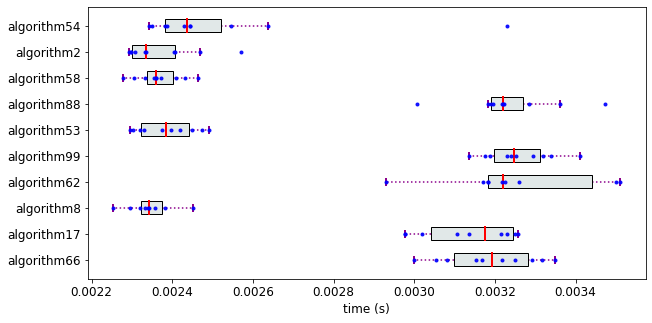

In [103]:
fig = mv.show_measurements_boxplots(scale=0.5)

In [104]:
len(ms.get_alg_measurements()['algorithm10'])

10

In [71]:
#dc = ms.data_collector
#ct = dc.get_case_table()
#ct[ct['case:flops'] == ct['case:flops'].min()]

In [105]:
rv = RankVariantsDFGTr(ms.get_alg_measurements(), alg_list)

In [106]:
rv.rank_variants()

,case:concept:name,case:rank:q75-q25
0,algorithm8,0
1,algorithm53,0
2,algorithm58,0
3,algorithm2,0
4,algorithm54,1
5,algorithm66,2
6,algorithm17,2
7,algorithm62,2
8,algorithm99,2
9,algorithm88,2


In [107]:
rv = RankVariantsSort2(ms.get_alg_measurements(), alg_list)

In [114]:
ranks = rv.rank_variants()
ranks

,case:concept:name,case:rank:q75-q25
0,algorithm8,0
1,algorithm53,0
2,algorithm58,0
3,algorithm2,0
4,algorithm54,0
5,algorithm66,1
6,algorithm17,1
7,algorithm62,1
8,algorithm99,1
9,algorithm88,1


In [109]:
dc = ms.data_collector
ct = dc.get_case_table()

scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/va4algs-exps/GLS/experiments/1000_100/case_table.csv linnea/GLS/cluster-data/1000_100
b''


In [115]:
df = ct[ct['case:concept:name'].isin(alg_list)].sort_values(by=['case:flops'])
df = df.merge(ranks, on='case:concept:name')
df

,case:concept:name,case:flops,case:num_kernels,case:rank:q75-q25
0,algorithm8,445000000.0,8,0
1,algorithm2,445000000.0,8,0
2,algorithm17,447000000.0,8,1
3,algorithm53,455000000.0,8,0
4,algorithm54,455000000.0,8,0
5,algorithm58,455000000.0,8,0
6,algorithm62,456000000.0,10,1
7,algorithm66,456000000.0,10,1
8,algorithm99,466000000.0,10,1
9,algorithm88,466000000.0,10,1


In [151]:
df.to_csv(os.path.join(ms.data_collector.local_data_dir,
                       'ct_competing_variants.csv'))

In [117]:
et = dc.get_meta_table()

In [118]:
def clean_concept(name):
    splits = name.split('=')
    if len(splits) > 1:
        return splits[-1].strip()
    return splits[0].strip()

et['concept:name'] = et['concept:name'].apply(lambda row: clean_concept(row))

In [119]:
et

,case:concept:name,concept:name,concept:flops,concept:kernel,concept:operation,timestamp:start
0,algorithm87,LAPACK.potrf_3.33e+08,333000000.0,"LAPACK.potrf!('L', ml1)",(L2 L2^T) = M,2022-12-23 14:10:36.044360
1,algorithm87,trsm_1e+08,100000000.0,"trsm!('L', 'L', 'N', 'N', 1.0, ml1, ml0)",tmp12 = (L2^-1 X),2022-12-23 14:10:37.044360
2,algorithm87,trsv_1e+06,1000000.0,"trsv!('L', 'N', 'N', ml1, ml2)",tmp68 = (L2^-1 y),2022-12-23 14:10:38.044360
3,algorithm87,gemm_2e+07,20000000.0,"gemm!('T', 'N', 1.0, ml0, ml0, 0.0, ml3)",tmp14 = (tmp12^T tmp12),2022-12-23 14:10:39.044360
4,algorithm87,LAPACK.potrf_3.33e+05,333000.0,"LAPACK.potrf!('L', ml3)",(L15 L15^T) = tmp14,2022-12-23 14:10:40.044360
...,...,...,...,...,...,...
879,algorithm98,trsv_1e+06,1000000.0,"trsv!('L', 'N', 'N', ml1, ml2)",tmp68 = (L2^-1 y),2022-12-23 14:29:01.044360
880,algorithm98,trsm_1e+07,10000000.0,"trsm!('L', 'L', 'N', 'N', 1.0, ml4, ml3)",tmp219 = (L15^-1 tmp56),2022-12-23 14:29:02.044360
881,algorithm98,trsv_1e+06,1000000.0,"trsv!('L', 'T', 'N', ml1, ml2)",tmp71 = (L2^-T tmp68),2022-12-23 14:29:03.044360
882,algorithm98,trsm_1e+07,10000000.0,"trsm!('L', 'L', 'T', 'N', 1.0, ml4, ml3)",tmp90 = (L15^-T tmp219),2022-12-23 14:29:04.044360


In [125]:
xes_log = log_converter.apply(et)
best = df[df['case:rank:q75-q25']==0]['case:concept:name'].tolist()
worst = df[df['case:rank:q75-q25']==1]['case:concept:name'].tolist()

In [126]:
best, worst

(['algorithm8', 'algorithm2', 'algorithm53', 'algorithm54', 'algorithm58'],
 ['algorithm17', 'algorithm62', 'algorithm66', 'algorithm99', 'algorithm88'])

In [133]:
activity_key = 'concept:name'
#activity_key = 'concept:operation'

In [134]:
vc = VariantsCompare(xes_log,best,worst,activity_key=activity_key)

/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


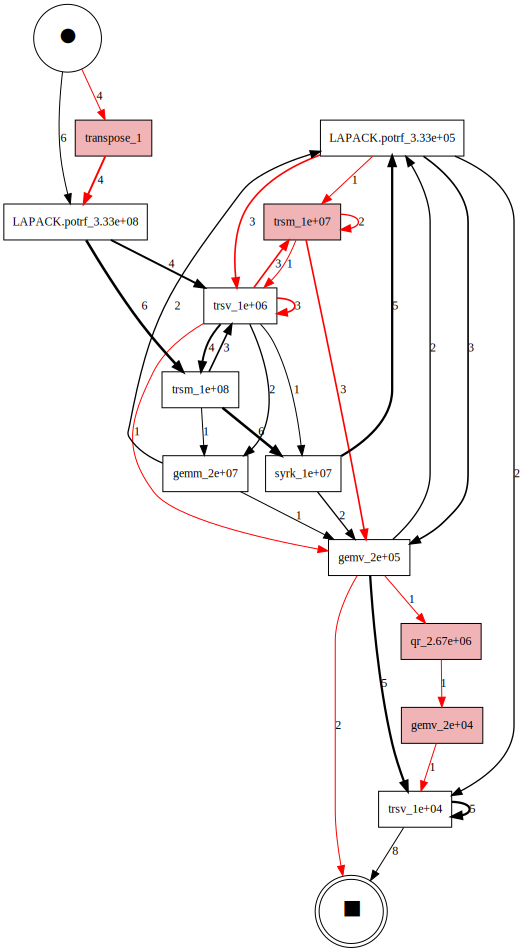

In [135]:
gviz = vc.get_dfg_minus_best()
gviz

In [136]:
best = ['algorithm2', 'algorithm8']
worst = alg_list.copy()
for v in best:
    worst.remove(v)
vc = VariantsCompare(xes_log,best,worst,activity_key=activity_key)

/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


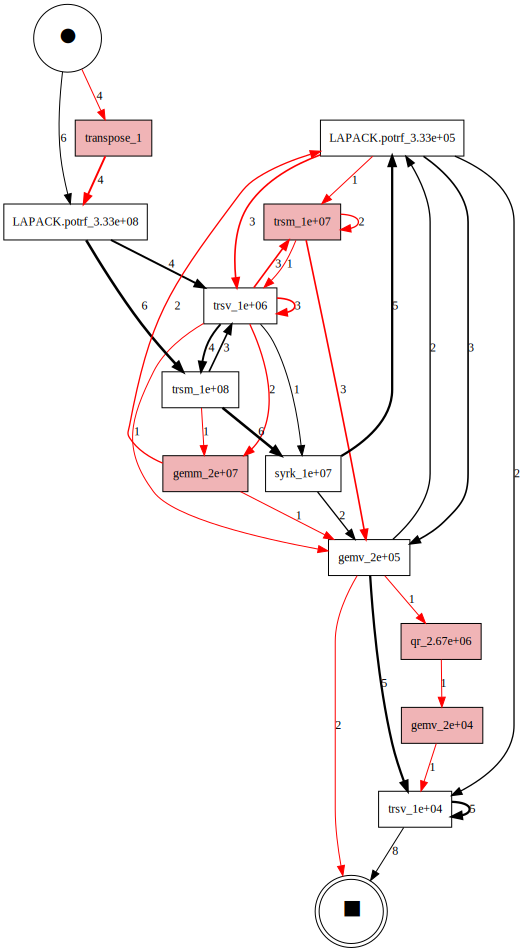

In [137]:
gviz = vc.get_dfg_minus_best()
gviz

In [138]:
best = ['algorithm2', 'algorithm8']
worst = ['algorithm53', 'algorithm54','algorithm58' ]
vc = VariantsCompare(xes_log,best,worst,activity_key=activity_key)

/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


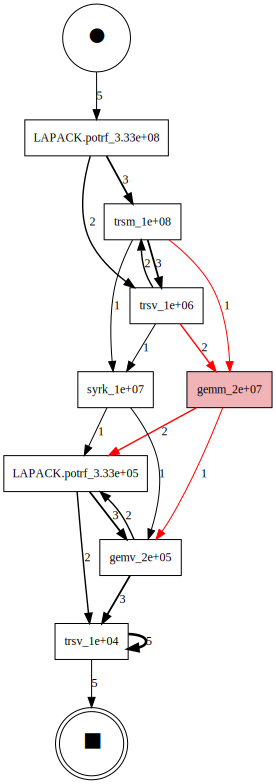

In [139]:
gviz = vc.get_dfg_minus_best()
gviz

/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


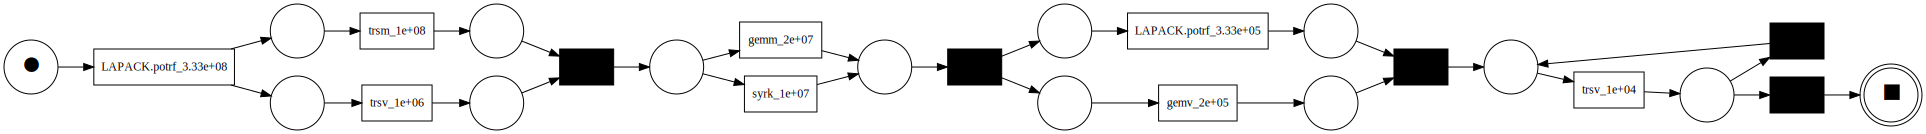

In [141]:
vc.show_petrinet(best+worst, activity_key=activity_key)